In [175]:
%matplotlib inline
%load_ext rpy2.ipython
import random
import pandas as pdgo
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd
import xgboost
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import matplotlib as mpl
mpl.style.use('ggplot')
np.random.seed(333)
def compute_trimmed_rmse(prediction,target):
    prediction[prediction>20] = 20
    prediction[prediction<0] = 0
    target[target>20] = 20
    target[target<0] = 0
    numer = sum((prediction - target)**2)
    denom = len(prediction)
    return np.sqrt(numer/denom)

def rmse(prediction,target):
    numer = sum((prediction - target)**2)
    denom = len(prediction)
    return np.sqrt(numer/denom)

def month_split(dataframe, on_unique):
    train = dataframe[dataframe['unique'] < on_unique]
    test = dataframe[dataframe['unique'] == on_unique]
    return train,test

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [180]:
%macro -q __toolboxforsalesdata 1

In [181]:
%store __toolboxforsalesdata

Stored '__toolboxforsalesdata' (Macro)


In [2]:
month_agg4 = pd.read_csv('month_agg4.csv')

In [3]:
fake_test4 = pd.read_csv('fake_test4.csv')

In [4]:
train33,val33 = month_split(month_agg4,33)

In [5]:
train33.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN


In [6]:
dropped_col_train33_no_na = train33.copy().drop(['shop_id','item_id','item_category_id','item_cnt_month'] , axis = 1).dropna()

In [7]:
dropped_col_val33_no_na = val33.copy().drop(['shop_id','item_id','item_category_id','item_cnt_month'] , axis = 1).dropna()

In [8]:
dropped_col_train33_no_na.head()

,unique,item_price,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
63226,1,221.0,False,6.0,299.0,33489.0
63227,1,347.0,False,3.0,61.0,6094.0
63228,1,247.0,False,1.0,78.0,33489.0
63233,1,127.0,True,2.0,13.0,1539.0
63238,1,268.0,False,25.0,361.0,33489.0


In [9]:
xg_train = xgboost.DMatrix(dropped_col_train33_no_na,label = train33.copy().dropna()['item_cnt_month'])
xg_val = xgboost.DMatrix(dropped_col_val33_no_na,label = val33.copy().dropna()['item_cnt_month'])

In [10]:
param = {'max_depth': 1, 'eta': 0.001, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [11]:
xg_model_1_001_subsample_1 = xgboost.train(param , xg_train,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")] ,num_boost_round=2000)

[0]	train_set-rmse:11.8957	validation_set-rmse:22.7185
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:11.8909	validation_set-rmse:22.7161
[2]	train_set-rmse:11.8862	validation_set-rmse:22.7137
[3]	train_set-rmse:11.8814	validation_set-rmse:22.7113
[4]	train_set-rmse:11.8766	validation_set-rmse:22.709
[5]	train_set-rmse:11.8719	validation_set-rmse:22.7066
[6]	train_set-rmse:11.8671	validation_set-rmse:22.7043
[7]	train_set-rmse:11.8624	validation_set-rmse:22.7019
[8]	train_set-rmse:11.8577	validation_set-rmse:22.6996
[9]	train_set-rmse:11.853	validation_set-rmse:22.6972
[10]	train_set-rmse:11.8482	validation_set-rmse:22.6949
[11]	train_set-rmse:11.8435	validation_set-rmse:22.6926
[12]	train_set-rmse:11.8388	validation_set-rmse:22.6903
[13]	train_set-rmse:11.8341	validation_set-rmse:22.6879
[14]	train_set-rmse:11.8295	validation_set-rmse:22.6856
[15]	trai

[144]	train_set-rmse:11.2802	validation_set-rmse:22.4198
[145]	train_set-rmse:11.2764	validation_set-rmse:22.418
[146]	train_set-rmse:11.2726	validation_set-rmse:22.4162
[147]	train_set-rmse:11.2689	validation_set-rmse:22.4144
[148]	train_set-rmse:11.2651	validation_set-rmse:22.4126
[149]	train_set-rmse:11.2613	validation_set-rmse:22.4108
[150]	train_set-rmse:11.2576	validation_set-rmse:22.409
[151]	train_set-rmse:11.2538	validation_set-rmse:22.4072
[152]	train_set-rmse:11.25	validation_set-rmse:22.4055
[153]	train_set-rmse:11.2463	validation_set-rmse:22.4037
[154]	train_set-rmse:11.2426	validation_set-rmse:22.4019
[155]	train_set-rmse:11.2388	validation_set-rmse:22.4001
[156]	train_set-rmse:11.2351	validation_set-rmse:22.3984
[157]	train_set-rmse:11.2314	validation_set-rmse:22.3966
[158]	train_set-rmse:11.2277	validation_set-rmse:22.3949
[159]	train_set-rmse:11.224	validation_set-rmse:22.3931
[160]	train_set-rmse:11.2203	validation_set-rmse:22.3913
[161]	train_set-rmse:11.2166	validat

[289]	train_set-rmse:10.7813	validation_set-rmse:22.0814
[290]	train_set-rmse:10.7782	validation_set-rmse:22.0784
[291]	train_set-rmse:10.7751	validation_set-rmse:22.0768
[292]	train_set-rmse:10.772	validation_set-rmse:22.0738
[293]	train_set-rmse:10.7689	validation_set-rmse:22.0722
[294]	train_set-rmse:10.7657	validation_set-rmse:22.0708
[295]	train_set-rmse:10.7626	validation_set-rmse:22.0678
[296]	train_set-rmse:10.7595	validation_set-rmse:22.0662
[297]	train_set-rmse:10.7564	validation_set-rmse:22.0632
[298]	train_set-rmse:10.7533	validation_set-rmse:22.0617
[299]	train_set-rmse:10.7502	validation_set-rmse:22.0587
[300]	train_set-rmse:10.7472	validation_set-rmse:22.0571
[301]	train_set-rmse:10.7441	validation_set-rmse:22.0541
[302]	train_set-rmse:10.741	validation_set-rmse:22.0526
[303]	train_set-rmse:10.7379	validation_set-rmse:22.0496
[304]	train_set-rmse:10.7348	validation_set-rmse:22.0482
[305]	train_set-rmse:10.7318	validation_set-rmse:22.0452
[306]	train_set-rmse:10.7287	vali

[434]	train_set-rmse:10.3653	validation_set-rmse:21.7962
[435]	train_set-rmse:10.3627	validation_set-rmse:21.7949
[436]	train_set-rmse:10.36	validation_set-rmse:21.7937
[437]	train_set-rmse:10.3574	validation_set-rmse:21.7917
[438]	train_set-rmse:10.3548	validation_set-rmse:21.7904
[439]	train_set-rmse:10.3521	validation_set-rmse:21.7884
[440]	train_set-rmse:10.3495	validation_set-rmse:21.7858
[441]	train_set-rmse:10.3469	validation_set-rmse:21.7845
[442]	train_set-rmse:10.3443	validation_set-rmse:21.7825
[443]	train_set-rmse:10.3417	validation_set-rmse:21.7812
[444]	train_set-rmse:10.3391	validation_set-rmse:21.7792
[445]	train_set-rmse:10.3365	validation_set-rmse:21.778
[446]	train_set-rmse:10.3339	validation_set-rmse:21.7761
[447]	train_set-rmse:10.3313	validation_set-rmse:21.7748
[448]	train_set-rmse:10.3287	validation_set-rmse:21.7722
[449]	train_set-rmse:10.3261	validation_set-rmse:21.7702
[450]	train_set-rmse:10.3235	validation_set-rmse:21.7689
[451]	train_set-rmse:10.3209	valid

[579]	train_set-rmse:10.0113	validation_set-rmse:21.6261
[580]	train_set-rmse:10.009	validation_set-rmse:21.626
[581]	train_set-rmse:10.0067	validation_set-rmse:21.6249
[582]	train_set-rmse:10.0045	validation_set-rmse:21.6232
[583]	train_set-rmse:10.0022	validation_set-rmse:21.6208
[584]	train_set-rmse:9.99996	validation_set-rmse:21.6208
[585]	train_set-rmse:9.99771	validation_set-rmse:21.6197
[586]	train_set-rmse:9.99546	validation_set-rmse:21.6196
[587]	train_set-rmse:9.99321	validation_set-rmse:21.6186
[588]	train_set-rmse:9.99097	validation_set-rmse:21.6169
[589]	train_set-rmse:9.98872	validation_set-rmse:21.6158
[590]	train_set-rmse:9.98648	validation_set-rmse:21.6157
[591]	train_set-rmse:9.98424	validation_set-rmse:21.6146
[592]	train_set-rmse:9.98201	validation_set-rmse:21.6128
[593]	train_set-rmse:9.97977	validation_set-rmse:21.6128
[594]	train_set-rmse:9.97754	validation_set-rmse:21.6117
[595]	train_set-rmse:9.97531	validation_set-rmse:21.6094
[596]	train_set-rmse:9.97308	vali

[724]	train_set-rmse:9.70594	validation_set-rmse:21.4844
[725]	train_set-rmse:9.70399	validation_set-rmse:21.4843
[726]	train_set-rmse:9.70204	validation_set-rmse:21.4822
[727]	train_set-rmse:9.70009	validation_set-rmse:21.4807
[728]	train_set-rmse:9.69814	validation_set-rmse:21.4803
[729]	train_set-rmse:9.69619	validation_set-rmse:21.4802
[730]	train_set-rmse:9.69425	validation_set-rmse:21.4793
[731]	train_set-rmse:9.6923	validation_set-rmse:21.4793
[732]	train_set-rmse:9.69036	validation_set-rmse:21.4789
[733]	train_set-rmse:9.68842	validation_set-rmse:21.4773
[734]	train_set-rmse:9.68648	validation_set-rmse:21.4746
[735]	train_set-rmse:9.68455	validation_set-rmse:21.4745
[736]	train_set-rmse:9.68262	validation_set-rmse:21.4742
[737]	train_set-rmse:9.68068	validation_set-rmse:21.4726
[738]	train_set-rmse:9.67876	validation_set-rmse:21.4706
[739]	train_set-rmse:9.67683	validation_set-rmse:21.4705
[740]	train_set-rmse:9.6749	validation_set-rmse:21.4701
[741]	train_set-rmse:9.67298	vali

[869]	train_set-rmse:9.44191	validation_set-rmse:21.3665
[870]	train_set-rmse:9.44022	validation_set-rmse:21.3647
[871]	train_set-rmse:9.43853	validation_set-rmse:21.3644
[872]	train_set-rmse:9.43684	validation_set-rmse:21.3629
[873]	train_set-rmse:9.43515	validation_set-rmse:21.3629
[874]	train_set-rmse:9.43347	validation_set-rmse:21.3626
[875]	train_set-rmse:9.43178	validation_set-rmse:21.3612
[876]	train_set-rmse:9.4301	validation_set-rmse:21.3604
[877]	train_set-rmse:9.42842	validation_set-rmse:21.3604
[878]	train_set-rmse:9.42675	validation_set-rmse:21.3582
[879]	train_set-rmse:9.42507	validation_set-rmse:21.3579
[880]	train_set-rmse:9.42339	validation_set-rmse:21.3565
[881]	train_set-rmse:9.42172	validation_set-rmse:21.3564
[882]	train_set-rmse:9.42005	validation_set-rmse:21.3561
[883]	train_set-rmse:9.41838	validation_set-rmse:21.3552
[884]	train_set-rmse:9.41671	validation_set-rmse:21.3527
[885]	train_set-rmse:9.41505	validation_set-rmse:21.3513
[886]	train_set-rmse:9.41338	val

[1014]	train_set-rmse:9.21341	validation_set-rmse:21.2417
[1015]	train_set-rmse:9.21194	validation_set-rmse:21.2417
[1016]	train_set-rmse:9.21048	validation_set-rmse:21.241
[1017]	train_set-rmse:9.20902	validation_set-rmse:21.2393
[1018]	train_set-rmse:9.20756	validation_set-rmse:21.2384
[1019]	train_set-rmse:9.2061	validation_set-rmse:21.2382
[1020]	train_set-rmse:9.20464	validation_set-rmse:21.237
[1021]	train_set-rmse:9.20319	validation_set-rmse:21.2368
[1022]	train_set-rmse:9.20173	validation_set-rmse:21.2367
[1023]	train_set-rmse:9.20028	validation_set-rmse:21.2348
[1024]	train_set-rmse:9.19883	validation_set-rmse:21.2336
[1025]	train_set-rmse:9.19738	validation_set-rmse:21.2333
[1026]	train_set-rmse:9.19593	validation_set-rmse:21.2325
[1027]	train_set-rmse:9.19449	validation_set-rmse:21.2318
[1028]	train_set-rmse:9.19304	validation_set-rmse:21.2307
[1029]	train_set-rmse:9.1916	validation_set-rmse:21.2304
[1030]	train_set-rmse:9.19015	validation_set-rmse:21.2304
[1031]	train_set-r

[1156]	train_set-rmse:9.01949	validation_set-rmse:21.1351
[1157]	train_set-rmse:9.01822	validation_set-rmse:21.1339
[1158]	train_set-rmse:9.01695	validation_set-rmse:21.1337
[1159]	train_set-rmse:9.01568	validation_set-rmse:21.133
[1160]	train_set-rmse:9.01441	validation_set-rmse:21.1324
[1161]	train_set-rmse:9.01315	validation_set-rmse:21.1314
[1162]	train_set-rmse:9.01189	validation_set-rmse:21.1311
[1163]	train_set-rmse:9.01062	validation_set-rmse:21.1311
[1164]	train_set-rmse:9.00936	validation_set-rmse:21.1293
[1165]	train_set-rmse:9.0081	validation_set-rmse:21.1283
[1166]	train_set-rmse:9.00684	validation_set-rmse:21.1281
[1167]	train_set-rmse:9.00559	validation_set-rmse:21.1273
[1168]	train_set-rmse:9.00433	validation_set-rmse:21.1271
[1169]	train_set-rmse:9.00308	validation_set-rmse:21.126
[1170]	train_set-rmse:9.00182	validation_set-rmse:21.126
[1171]	train_set-rmse:9.00057	validation_set-rmse:21.1254
[1172]	train_set-rmse:8.99932	validation_set-rmse:21.1239
[1173]	train_set-r

[1298]	train_set-rmse:8.85128	validation_set-rmse:21.0392
[1299]	train_set-rmse:8.85018	validation_set-rmse:21.0376
[1300]	train_set-rmse:8.84907	validation_set-rmse:21.0369
[1301]	train_set-rmse:8.84797	validation_set-rmse:21.0367
[1302]	train_set-rmse:8.84687	validation_set-rmse:21.0358
[1303]	train_set-rmse:8.84578	validation_set-rmse:21.0352
[1304]	train_set-rmse:8.84468	validation_set-rmse:21.0352
[1305]	train_set-rmse:8.84358	validation_set-rmse:21.0343
[1306]	train_set-rmse:8.84249	validation_set-rmse:21.0341
[1307]	train_set-rmse:8.84139	validation_set-rmse:21.0327
[1308]	train_set-rmse:8.8403	validation_set-rmse:21.032
[1309]	train_set-rmse:8.83921	validation_set-rmse:21.0318
[1310]	train_set-rmse:8.83812	validation_set-rmse:21.0309
[1311]	train_set-rmse:8.83703	validation_set-rmse:21.0307
[1312]	train_set-rmse:8.83594	validation_set-rmse:21.0307
[1313]	train_set-rmse:8.83485	validation_set-rmse:21.0298
[1314]	train_set-rmse:8.83376	validation_set-rmse:21.0279
[1315]	train_set

[1440]	train_set-rmse:8.70497	validation_set-rmse:20.952
[1441]	train_set-rmse:8.70401	validation_set-rmse:20.9514
[1442]	train_set-rmse:8.70305	validation_set-rmse:20.951
[1443]	train_set-rmse:8.7021	validation_set-rmse:20.9502
[1444]	train_set-rmse:8.70114	validation_set-rmse:20.95
[1445]	train_set-rmse:8.70018	validation_set-rmse:20.95
[1446]	train_set-rmse:8.69923	validation_set-rmse:20.9485
[1447]	train_set-rmse:8.69828	validation_set-rmse:20.9476
[1448]	train_set-rmse:8.69732	validation_set-rmse:20.9475
[1449]	train_set-rmse:8.69637	validation_set-rmse:20.9469
[1450]	train_set-rmse:8.69542	validation_set-rmse:20.9467
[1451]	train_set-rmse:8.69447	validation_set-rmse:20.9459
[1452]	train_set-rmse:8.69352	validation_set-rmse:20.9449
[1453]	train_set-rmse:8.69257	validation_set-rmse:20.9444
[1454]	train_set-rmse:8.69162	validation_set-rmse:20.9444
[1455]	train_set-rmse:8.69068	validation_set-rmse:20.9427
[1456]	train_set-rmse:8.68973	validation_set-rmse:20.9418
[1457]	train_set-rmse

[1582]	train_set-rmse:8.57748	validation_set-rmse:20.876
[1583]	train_set-rmse:8.57664	validation_set-rmse:20.876
[1584]	train_set-rmse:8.57579	validation_set-rmse:20.876
[1585]	train_set-rmse:8.57495	validation_set-rmse:20.8754
[1586]	train_set-rmse:8.57412	validation_set-rmse:20.874
[1587]	train_set-rmse:8.57328	validation_set-rmse:20.874
[1588]	train_set-rmse:8.57244	validation_set-rmse:20.8733
[1589]	train_set-rmse:8.5716	validation_set-rmse:20.8728
[1590]	train_set-rmse:8.57076	validation_set-rmse:20.8728
[1591]	train_set-rmse:8.56993	validation_set-rmse:20.8722
[1592]	train_set-rmse:8.56909	validation_set-rmse:20.8706
[1593]	train_set-rmse:8.56826	validation_set-rmse:20.87
[1594]	train_set-rmse:8.56743	validation_set-rmse:20.87
[1595]	train_set-rmse:8.56659	validation_set-rmse:20.87
[1596]	train_set-rmse:8.56576	validation_set-rmse:20.8691
[1597]	train_set-rmse:8.56493	validation_set-rmse:20.8691
[1598]	train_set-rmse:8.5641	validation_set-rmse:20.8685
[1599]	train_set-rmse:8.563

[1725]	train_set-rmse:8.46388	validation_set-rmse:20.8148
[1726]	train_set-rmse:8.46313	validation_set-rmse:20.8139
[1727]	train_set-rmse:8.46238	validation_set-rmse:20.8134
[1728]	train_set-rmse:8.46163	validation_set-rmse:20.8134
[1729]	train_set-rmse:8.46088	validation_set-rmse:20.813
[1730]	train_set-rmse:8.46014	validation_set-rmse:20.8116
[1731]	train_set-rmse:8.45939	validation_set-rmse:20.8111
[1732]	train_set-rmse:8.45865	validation_set-rmse:20.8111
[1733]	train_set-rmse:8.4579	validation_set-rmse:20.8105
[1734]	train_set-rmse:8.45716	validation_set-rmse:20.8105
[1735]	train_set-rmse:8.45641	validation_set-rmse:20.8105
[1736]	train_set-rmse:8.45567	validation_set-rmse:20.81
[1737]	train_set-rmse:8.45492	validation_set-rmse:20.8096
[1738]	train_set-rmse:8.45418	validation_set-rmse:20.8092
[1739]	train_set-rmse:8.45344	validation_set-rmse:20.8092
[1740]	train_set-rmse:8.4527	validation_set-rmse:20.8092
[1741]	train_set-rmse:8.45196	validation_set-rmse:20.8084
[1742]	train_set-rm

[1867]	train_set-rmse:8.36305	validation_set-rmse:20.7591
[1868]	train_set-rmse:8.36238	validation_set-rmse:20.7587
[1869]	train_set-rmse:8.36171	validation_set-rmse:20.7584
[1870]	train_set-rmse:8.36104	validation_set-rmse:20.7578
[1871]	train_set-rmse:8.36037	validation_set-rmse:20.7578
[1872]	train_set-rmse:8.3597	validation_set-rmse:20.7574
[1873]	train_set-rmse:8.35903	validation_set-rmse:20.7574
[1874]	train_set-rmse:8.35836	validation_set-rmse:20.7561
[1875]	train_set-rmse:8.35769	validation_set-rmse:20.7556
[1876]	train_set-rmse:8.35703	validation_set-rmse:20.7556
[1877]	train_set-rmse:8.35636	validation_set-rmse:20.7549
[1878]	train_set-rmse:8.35569	validation_set-rmse:20.7545
[1879]	train_set-rmse:8.35503	validation_set-rmse:20.7544
[1880]	train_set-rmse:8.35436	validation_set-rmse:20.7544
[1881]	train_set-rmse:8.3537	validation_set-rmse:20.7544
[1882]	train_set-rmse:8.35303	validation_set-rmse:20.754
[1883]	train_set-rmse:8.35237	validation_set-rmse:20.7529
[1884]	train_set-

In [12]:
prediction_train = xg_model_1_001_subsample_1.predict(xg_train)

In [13]:
compute_trimmed_rmse(prediction_train,xg_train.get_label())

2.7975025911119022

In [14]:
prediction_xgb_best = xg_model_1_001_subsample_1.predict(xg_val)

In [15]:
compute_trimmed_rmse(prediction_xgb_best,xg_val.get_label())

2.4473890149739757

In [16]:
#Linear Model
lm_model = LinearRegression(fit_intercept = True ,n_jobs = -1)

In [17]:
for_lin = train33.dropna()

In [18]:
lm_model.fit(dropped_col_train33_no_na , train33.dropna()['item_cnt_month'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [19]:
lin_prediction = lm_model.predict(dropped_col_val33_no_na)

In [20]:
ensemble_lin_xgb = (lin_prediction + prediction_xgb_best)/2

In [21]:
rmse(ensemble_lin_xgb,val33.dropna()['item_cnt_month'])

20.782670540027688

In [22]:
compute_trimmed_rmse(ensemble_lin_xgb,val33.dropna()['item_cnt_month'])

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.1514849785860064

In [23]:
#Checking how good on leaderboard
fake_test4.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,item_price,lag_only_item_cat,unique
0,0,5,5037,19.0,1,False,NaN,25.0,1693.518519,2443.0,34
1,1,5,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,34
2,2,5,5233,19.0,2,False,1.0,42.0,859.000000,2443.0,34
3,3,5,5232,23.0,1,False,NaN,28.0,599.000000,2203.0,34
4,4,5,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,34


In [24]:
#Predicting only for Non Nan's
subset_pred = fake_test4.dropna()

In [25]:
subset_pred.drop(['ID','shop_id','item_id','item_category_id'], axis = 1 , inplace = True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
subset_pred.drop(['indicator'], axis = 1 , inplace = True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
subset_pred['is_music'] = pd.to_numeric(subset_pred['is_music'])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
subset_pred = subset_pred[list(dropped_col_train33_no_na.columns.values)]

In [29]:
test_preditcion = xg_model_1_001_subsample_1.predict(xgboost.DMatrix(subset_pred))

In [30]:
lin_test_preditcion = lm_model.predict(subset_pred)

In [31]:
subset_pred.head()

,unique,item_price,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
2,34,859.000000,False,1.0,42.0,2443.0
5,34,1896.305556,False,1.0,29.0,2203.0
6,34,3915.666667,False,2.0,62.0,6596.0
10,34,164.429167,False,3.0,123.0,4150.0
14,34,988.882716,False,2.0,89.0,2203.0


In [33]:
test_ensemble_lin_xgb = (test_preditcion + lin_test_preditcion)/2 #test_ensemble now test_ensemble_lin_xgb

In [34]:
test_ensemble_lin_xgb[test_ensemble_lin_xgb > 20] = 20
test_ensemble_lin_xgb[test_ensemble_lin_xgb < 0] = 0

In [35]:
test_ensemble_lin_xgb = pd.DataFrame(test_ensemble_lin_xgb,index = subset_pred.index)

In [36]:
test_ensemble_lin_xgb.columns = ['item_cnt_month']

In [37]:
concat = pd.concat([subset_pred,pd.DataFrame(test_ensemble_lin_xgb)] , axis = 1)

In [38]:
fake_test5 = fake_test4.merge(concat, left_index=True, right_index=True , how = 'left')

In [39]:
fake_test5 = fake_test5[['ID','item_cnt_month']]

In [40]:
fake_test5['item_cnt_month'].loc[pd.isnull(fake_test5['item_cnt_month'])] = 0

In [41]:
fake_test5.to_csv('test_ensemble_lin_xgb.csv',index = False)

In [43]:
#Okay Validation loss is higher than test loss.
#Due to 0-20 prediction cap nothing is predictable.
#Lets try random forests
#Parameters that be tuned
#1.Max_Depth
#2.Max_Features
#3.n_estimators

In [44]:
rf_n_est_1000_depth_20_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 20, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [45]:
rf_n_est_1000_depth_20_sqrt.fit(dropped_col_train33_no_na,train33.copy().dropna()['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [48]:
rf_n_est_1000_depth_10_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 10, n_jobs = 4, verbose = 1, max_features= "sqrt")

In [49]:
rf_n_est_1000_depth_10_sqrt.fit(dropped_col_train33_no_na,train33.copy().dropna()['item_cnt_month'])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  5.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [50]:
rf_n_est_1000_depth_5_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 5, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [51]:
rf_n_est_1000_depth_5_sqrt.fit(dropped_col_train33_no_na,train33.copy().dropna()['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [52]:
rf_n_est_1000_depth_3_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 3, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [53]:
rf_n_est_1000_depth_3_sqrt.fit(dropped_col_train33_no_na,train33.copy().dropna()['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [54]:
rf_n_est_1000_depth_1_sqrt = RandomForestRegressor(n_estimators = 1000, criterion='mse' , max_depth= 1, n_jobs = -1, verbose = 1, max_features= "sqrt")

In [55]:
rf_n_est_1000_depth_1_sqrt.fit(dropped_col_train33_no_na,train33.copy().dropna()['item_cnt_month'])

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [56]:
t1= (1,rmse(rf_n_est_1000_depth_1_sqrt.predict(dropped_col_val33_no_na), val33.copy().dropna()['item_cnt_month']))
t2 = (3,compute_trimmed_rmse(rf_n_est_1000_depth_3_sqrt.predict(dropped_col_val33_no_na), val33.copy().dropna()['item_cnt_month']))
t3 = (5,compute_trimmed_rmse(rf_n_est_1000_depth_5_sqrt.predict(dropped_col_val33_no_na), val33.copy().dropna()['item_cnt_month']))
t4 = (10,compute_trimmed_rmse(rf_n_est_1000_depth_10_sqrt.predict(dropped_col_val33_no_na), val33.copy().dropna()['item_cnt_month']))
t5 = (20,compute_trimmed_rmse(rf_n_est_1000_depth_20_sqrt.predict(dropped_col_val33_no_na), val33.copy().dropna()['item_cnt_month']))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

In [57]:
for_plot = pd.DataFrame([t1,t2,t3,t4,t5])

In [58]:
for_plot.columns = ['tree_depth', 'val_error']

In [59]:
for_plot

,tree_depth,val_error
0,1,21.700875
1,3,2.266358
2,5,2.283103
3,10,2.229947
4,20,2.196819


In [60]:
prediction_rf_best_depth = rf_n_est_1000_depth_3_sqrt.predict(dropped_col_val33_no_na)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


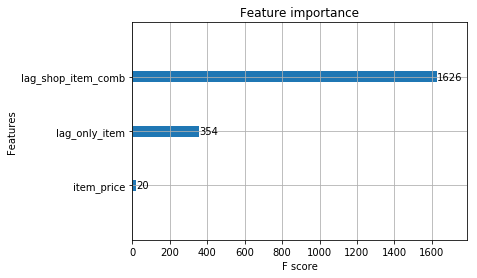

In [61]:
#Lets do variable importance for both Xgboost
xgboost.plot_importance(xg_model_1_001_subsample_1)
plt.show()

In [62]:
features = dropped_col_train33_no_na.columns.values

In [63]:
importance = rf_n_est_1000_depth_3_sqrt.feature_importances_

In [64]:
index = np.argsort(importance)

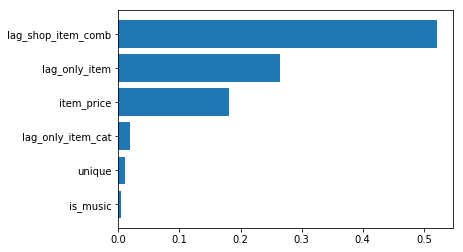

In [65]:
#For RF
plt.figure(1)
plt.barh(range(len(index)), importance[index])
plt.yticks(range(len(index)), [features[i] for i in index])
plt.show()

In [66]:
#Looks like both RF and Xgboost have given more importance to same set of variables
#Lets see Linear Model, lets fit it after standardizing so that can be compared
lm_model_standardized = LinearRegression(normalize=False, n_jobs = -1)

In [67]:
lm_model_standardized.fit(dropped_col_train33_no_na,train33.dropna()['item_cnt_month'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

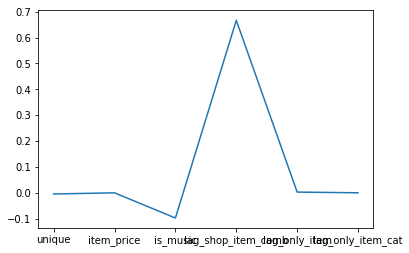

In [68]:
plotting = zip(dropped_col_train33_no_na.columns.values,lm_model_standardized.coef_)
for_plot = pd.DataFrame(list(plotting))
plt.plot(for_plot[0], for_plot[1])

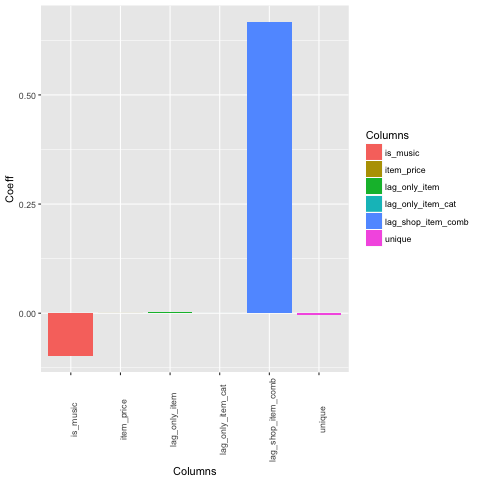

In [69]:
%%R -i for_plot
library(ggplot2)
figure = ggplot(data = for_plot)+
        geom_bar(mapping = aes(x = X0 , y = X1, fill = X0), stat = "identity")+
        theme(axis.text.x = element_text(angle = 90))+
        labs(x = "Columns" , y = "Coeff" ,fill = "Columns")
figure  

In [70]:
preditcion_lm_standardized = lm_model_standardized.predict(dropped_col_val33_no_na)

In [71]:
#Trying a triple ensemble
triple_ensemble = (prediction_xgb_best + preditcion_lm_standardized + prediction_rf_best_depth)/3

In [72]:
val_error_triple_ensemble = compute_trimmed_rmse(triple_ensemble, val33.dropna()['item_cnt_month'])

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
val_error_triple_ensemble #hmm

2.1558443660704252

In [74]:
subset_pred.head()

,unique,item_price,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat
2,34,859.000000,False,1.0,42.0,2443.0
5,34,1896.305556,False,1.0,29.0,2203.0
6,34,3915.666667,False,2.0,62.0,6596.0
10,34,164.429167,False,3.0,123.0,4150.0
14,34,988.882716,False,2.0,89.0,2203.0


In [75]:
#Subset pred is ready
test_xg_preditcion_trip_ens = xg_model_1_001_subsample_1.predict(xgboost.DMatrix(subset_pred))

In [76]:
lin_test_prediction_trip_ens = lm_model_standardized.predict(subset_pred)

In [77]:
rf_test_prediction_trip_ens = rf_n_est_1000_depth_3_sqrt.predict(subset_pred)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [78]:
test_submission_no_na = (test_xg_preditcion_trip_ens + lin_test_prediction_trip_ens + rf_test_prediction_trip_ens)/3

In [79]:
test_submission_no_na = pd.DataFrame(test_submission_no_na,index = subset_pred.index)

In [80]:
concat = pd.concat([subset_pred,pd.DataFrame(test_submission_no_na)] , axis = 1)

In [81]:
trip_ens_submission = fake_test4.merge(concat, left_index=True, right_index=True , how = 'left')

In [82]:
trip_ens_submission.rename(columns = {0 : 'item_cnt_month'} , inplace = True)

In [83]:
trip_ens_submission = trip_ens_submission[['ID','item_cnt_month']]

In [84]:
trip_ens_submission.loc[pd.isnull(trip_ens_submission['item_cnt_month']) , "item_cnt_month"] = 0

In [85]:
trip_ens_submission.loc[trip_ens_submission['item_cnt_month'] > 20 , 'item_cnt_month'] = 20
trip_ens_submission.loc[trip_ens_submission['item_cnt_month'] < 0  , 'item_cnt_month'] = 0

In [86]:
#Creating good validation strategy.
strategy_monitor = ['Model1', 'Model2', 'Model3','Model4','Ensemble_Type' ,'Val_Prediction_Name','Test_Prediction_Name', 'Validation_Type', 'Validation Set','Validation_Score_before_clip', 'Validation_Score_after_clip', 'Public_LB_Score']

In [87]:
val_error_triple_ensemble_no_clip = rmse(triple_ensemble, val33.dropna()['item_cnt_month'])

In [88]:
val_error_triple_ensemble_no_clip

22.151945534076113

In [89]:
val_error_triple_ensemble #LB Score 1.17125

2.1558443660704252

In [90]:
trip_ens_submission.to_csv('triple_ens_submission.csv' , index=False)

In [91]:
%%bash
mkdir validation_sets

mkdir: validation_sets: File exists


In [92]:
subset_pred.to_csv('validation_sets/subset_pred_month_33.csv', index=False)

In [93]:
strategy_monitor_1 = ['xg_model_1_001_subsample_1', 'lm_model_standardized', 'rf_n_est_1000_depth_3_sqrt', 'None', 'Average','triple_ensemble','trip_ens_submission','Time_based', 'subset_pred_33', '22.152128646601813', '2.1637059693554495', '1.17125']

In [94]:
monitoring_data = pd.concat([pd.DataFrame(strategy_monitor), pd.DataFrame(strategy_monitor_1)] , axis = 1)

In [95]:
monitoring_data = monitoring_data.T

In [96]:
monitoring_data = monitoring_data.reset_index()

In [97]:
monitoring_data.drop(['index'] , axis = 1 , inplace=True)

In [98]:
monitoring_data.columns = monitoring_data.iloc[0,:]

In [99]:
monitoring_data.head()

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,subset_pred_33,22.152128646601813,2.1637059693554495,1.17125


In [100]:
monitoring_data = monitoring_data.drop(0 , axis = 0).reset_index(drop = True)

In [101]:
monitoring_data.head()

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,subset_pred_33,22.152128646601813,2.1637059693554495,1.17125


In [102]:
#Probing with constants
triple_ensemble_sub_025 = triple_ensemble - 0.025

In [103]:
val_error_triple_ensemble_sub_025 = compute_trimmed_rmse(triple_ensemble_sub_025, val33.dropna()['item_cnt_month'])

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
val_error_triple_ensemble_sub_025 #Public LB 1.16766

2.1525758675326285

In [105]:
val_error_triple_ensemble_sub_025_no_clip = rmse(triple_ensemble_sub_025, val33.dropna()['item_cnt_month'])
val_error_triple_ensemble_sub_025_no_clip

22.152201326202153

In [106]:
trip_ens_submission_sub_025 = trip_ens_submission

In [107]:
trip_ens_submission_sub_025['item_cnt_month'] = trip_ens_submission_sub_025['item_cnt_month'] - 0.025 

In [108]:
trip_ens_submission_sub_025.loc[trip_ens_submission_sub_025['item_cnt_month'] > 20 , 'item_cnt_month'] = 20
trip_ens_submission_sub_025.loc[trip_ens_submission_sub_025['item_cnt_month'] < 0  , 'item_cnt_month'] = 0

In [109]:
trip_ens_submission_sub_025.to_csv('trip_ens_submission_sub_025.csv', index = False) 

In [110]:
strategy_monitor_2 = ['xg_model_1_001_subsample_1', 'lm_model_standardized', 'rf_n_est_1000_depth_3_sqrt', 'None', 'Average','triple_ensemble_sub_025','trip_ens_submission_sub_025','Time_based', 'subset_pred_33', '22.152376903448658', '2.1603721210789528', '1.16766']

In [111]:
monitoring_data = pd.concat([monitoring_data , pd.DataFrame(np.expand_dims(strategy_monitor_2,axis = 0) , columns = monitoring_data.columns)], axis = 0)

In [112]:
monitoring_data.reset_index(inplace = True, drop= True)

In [113]:
monitoring_data

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,subset_pred_33,22.152128646601813,2.1637059693554495,1.17125
1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,subset_pred_33,22.152376903448658,2.1603721210789528,1.16766


In [114]:
strategy_monitor_3 = ['xg_model_1_001_subsample_1', 'lm_model', 'None', 'None', 'Average','ensemble_lin_xgb','test_ensemble_lin_xgb','Time_based', 'subset_pred_33', '20.782376903448658', '2.1514849785860064', '1.4767']

In [115]:
monitoring_data = pd.concat([monitoring_data , pd.DataFrame(np.expand_dims(strategy_monitor_3,axis = 0) , columns = monitoring_data.columns)], axis = 0)

In [116]:
monitoring_data.reset_index(inplace = True, drop= True)

In [117]:
monitoring_data['Public_LB_Score'].replace('1.4767',value = '1.14767', inplace = True)

In [118]:
monitoring_data

,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score
0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,subset_pred_33,22.152128646601813,2.1637059693554495,1.17125
1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,subset_pred_33,22.152376903448658,2.1603721210789528,1.16766
2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,subset_pred_33,20.782376903448658,2.1514849785860064,1.14767


In [119]:
#Sending Single predictions with no ensembling

In [120]:
val_xg_model_1_001_subsample_1 = compute_trimmed_rmse(prediction_xgb_best, val33.dropna()['item_cnt_month'])
val_xg_model_1_001_subsample_1

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.4473890116412647

In [121]:
val_xg_model_1_001_subsample_1_no_clip = rmse(prediction_xgb_best, val33.dropna()['item_cnt_month'])
val_xg_model_1_001_subsample_1_no_clip

22.210023612056762

In [122]:
val_lin_prediction = compute_trimmed_rmse(lin_prediction, val33.dropna()['item_cnt_month'])
val_lin_prediction

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.4193532474565846

In [123]:
val_lin_prediction_no_clip = rmse(lin_prediction, val33.dropna()['item_cnt_month'])
val_lin_prediction_no_clip

22.171447672242579

In [124]:
val_rf_n_est_1000_depth_3_sqrt = compute_trimmed_rmse(prediction_rf_best_depth, val33.dropna()['item_cnt_month'])
val_rf_n_est_1000_depth_3_sqrt

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.266358262216623

In [125]:
val_rf_n_est_1000_depth_3_sqrt_no_clip = rmse(prediction_rf_best_depth, val33.dropna()['item_cnt_month'])
val_rf_n_est_1000_depth_3_sqrt_no_clip

22.171388405999824

In [126]:
monitoring_data["Validation Set"].replace('subset_pred_33','dropped_col_val33_no_na',inplace = True)

In [142]:
monitoring_data['Public_LB_Score'] = monitoring_data['Public_LB_Score'].astype(float, inplace = True)

In [143]:
monitoring_data['Validation_Score_after_clip'] = monitoring_data['Validation_Score_after_clip'].astype(float)
monitoring_data['Validation_Score_before_clip'] = monitoring_data['Validation_Score_before_clip'].astype(float)

In [144]:
monitoring_data.to_csv('monitoring_data.csv', index=False)

In [174]:
??fig.add_subplot

In [9]:
import matplotlib.pyplot as plt

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

In [11]:
import seaborn as sns

In [12]:
import pandas as pd

In [13]:
monitoring_data = pd.read_csv('monitoring_data.csv')

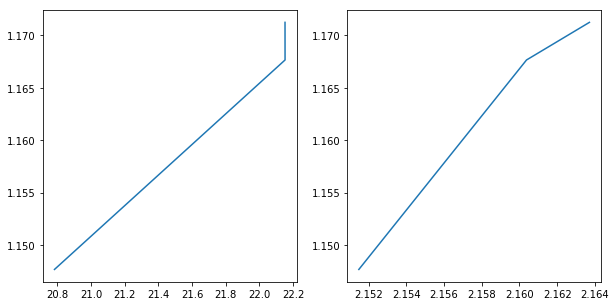

In [21]:
ax1.plot(monitoring_data['Validation_Score_before_clip'], monitoring_data['Public_LB_Score'])
ax2.plot(monitoring_data['Validation_Score_after_clip'], monitoring_data['Public_LB_Score'])
plt.show()

In [ ]:
??np.lo